# PERBANDINGAN JAM QFE
## Januari 2022

In [1]:
import pandas as dp
import numpy as np
from datetime import datetime
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

#File Synoptik dan AWS
df = dp.read_csv('C:/Users/Acer/Documents/QFESYNOP.csv')
df = df.drop(df.index[-3:])
dft = dp.read_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/DATA AWS 00-12 Januari 2023.csv')

In [2]:
#UJI T
def ujiT(synop):
  global p_two4
  sample1_bar4, sample2_bar4 = np.mean(df_sorted_4[synop]), np.mean(df_sorted1_4['pp_air'])
  n14, n24 = len(df_sorted_4[synop]), len(df_sorted_4[synop])
  df_4=(n14+n24)-2
  var_sample14, var_sample24= np.var(df_sorted_4[synop], ddof=1), np.var(df_sorted1_4['pp_air'], ddof=1)

  # pooled sample variance
  var4 = ( ((n14-1)*var_sample14) + ((n24-1)*var_sample24) ) / (n14+n24-2)

  # standard error
  std_error4 = np.sqrt(var4 * (1.0 / n14 + 1.0 / n24))

  # calculate t statistics
  t4 = abs(sample1_bar4- sample2_bar4) / std_error4
  print('t static:',t4)
  # two-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.975, df=df_4)
  print("Critical value for t two tailed:",t_c4)


  # one-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.95, df=df_4)
  print("Critical value for t one tailed:",t_c4)


  # get two-tailed p value
  p_two4= 2*(1-stats.t.cdf(x=t4, df=df_4))
  print("p-value for two tailed:",p_two4)

  # get one-tailed p value
  p_one4= 1-stats.t.cdf(x=t4, df=df_4)
  print("p-value for one tailed:",p_one4)
  if p_two4>=0.05:
    print("Tidak ada perbedaan yang signifikan antara dua kelompok data")
  else:
    print("Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).")

In [3]:
#Uji Mann-Whitney U
def mwu(synop):
  global p_value
  df_cleaned_4['pp_air'] = df_cleaned_4['pp_air'].astype(float)
  stat, p_value = mannwhitneyu(df_cleaned_4['pp_air'], df_cleaned14[synop])
  print('Statistics=%.2f, p=%.2f' % (stat, p_value))
  # Level of significance
  alpha = 0.05
  # conclusion
  if p_value < alpha:
      print('Terdapat perbedaan yang siginifikan antara 2 sampel data')
  else:
      print('Tidak ada perbedaan yang siginifikan antara 2 sampel data')

In [4]:
#Normalisasi Data
def absolute_maximum_scale(series):
  return series / series.abs().max()

Jam 00

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\775235275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([78, 130, 143, 156, 169, 182, 195, 208, 221, 234, 312, 338, 351, 364], dtype='int64')
P-value sinop: 0.7579927444458008
P-vaalue aws: 0.4271089434623718
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 15.660493594465036
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


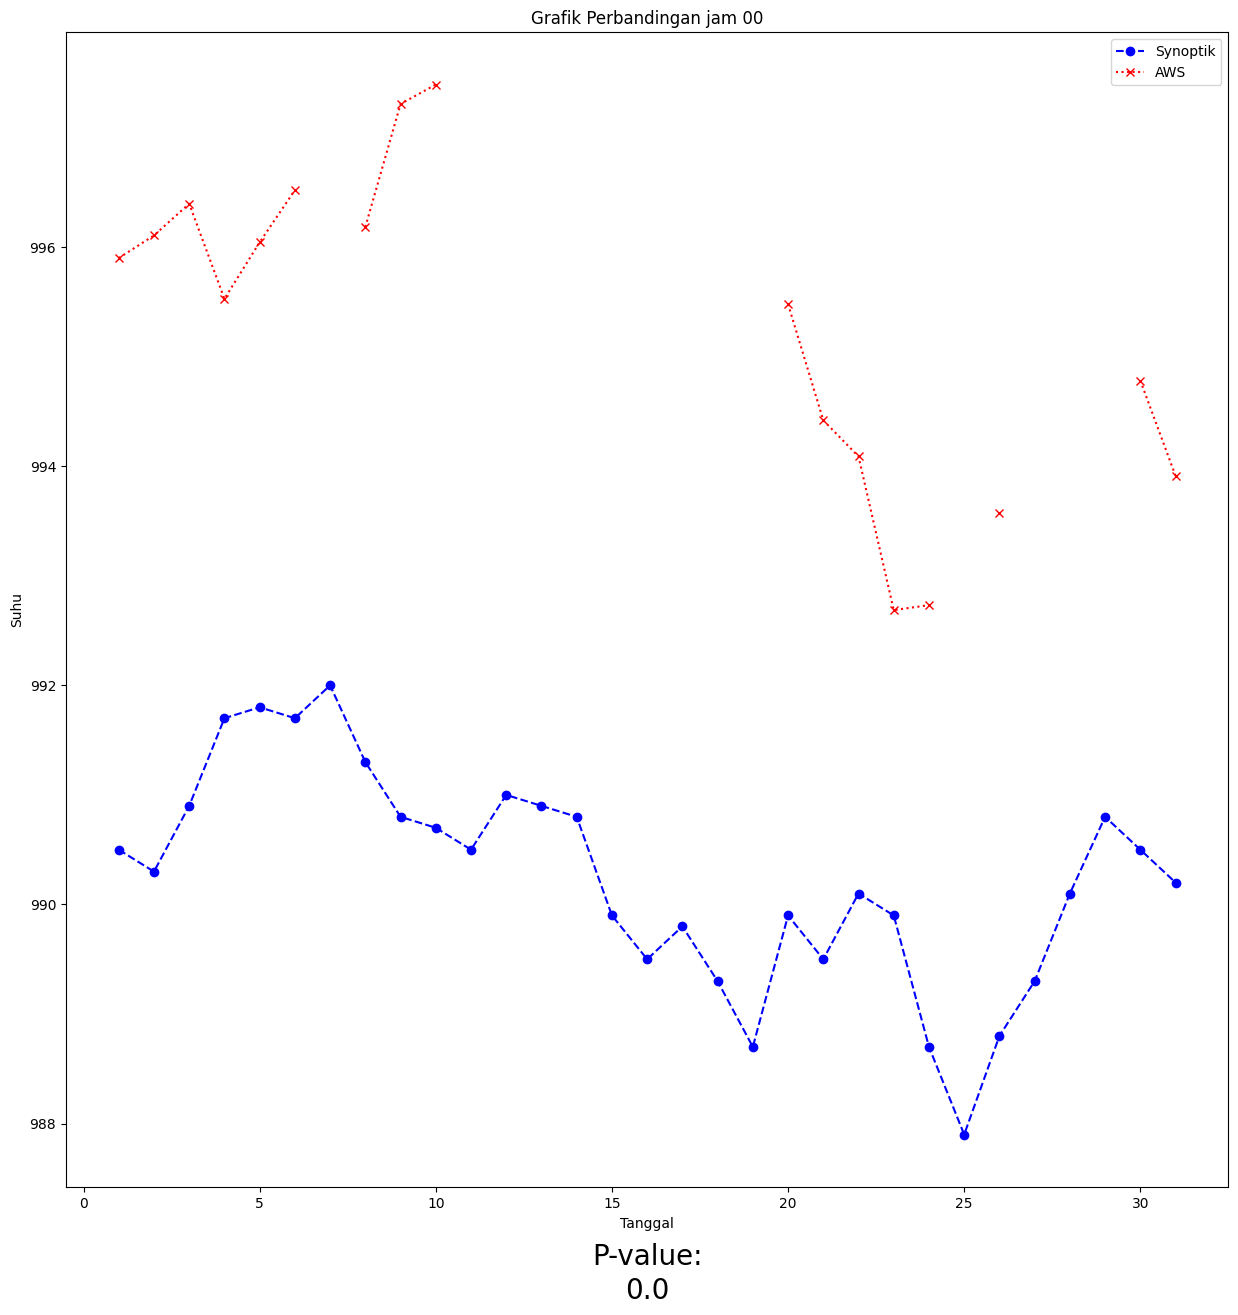

In [5]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['0']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='0', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['0'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('0')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['0']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='0', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['0'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('0')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('0')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('0')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['0']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='0', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['0'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('0')
    else:
      print("Dilakukan Uji T")
      ujiT('0')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('0')
    else:
      print("Dilakukan Uji T")
      ujiT('0')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 00')
plt.plot(df2_4['Tgl'], df2_4['0'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 1

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\3649980900.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([], dtype='int64')
P-value sinop: 0.5734102725982666
P-vaalue aws: 0.07799527049064636
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 15.05029141652784
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


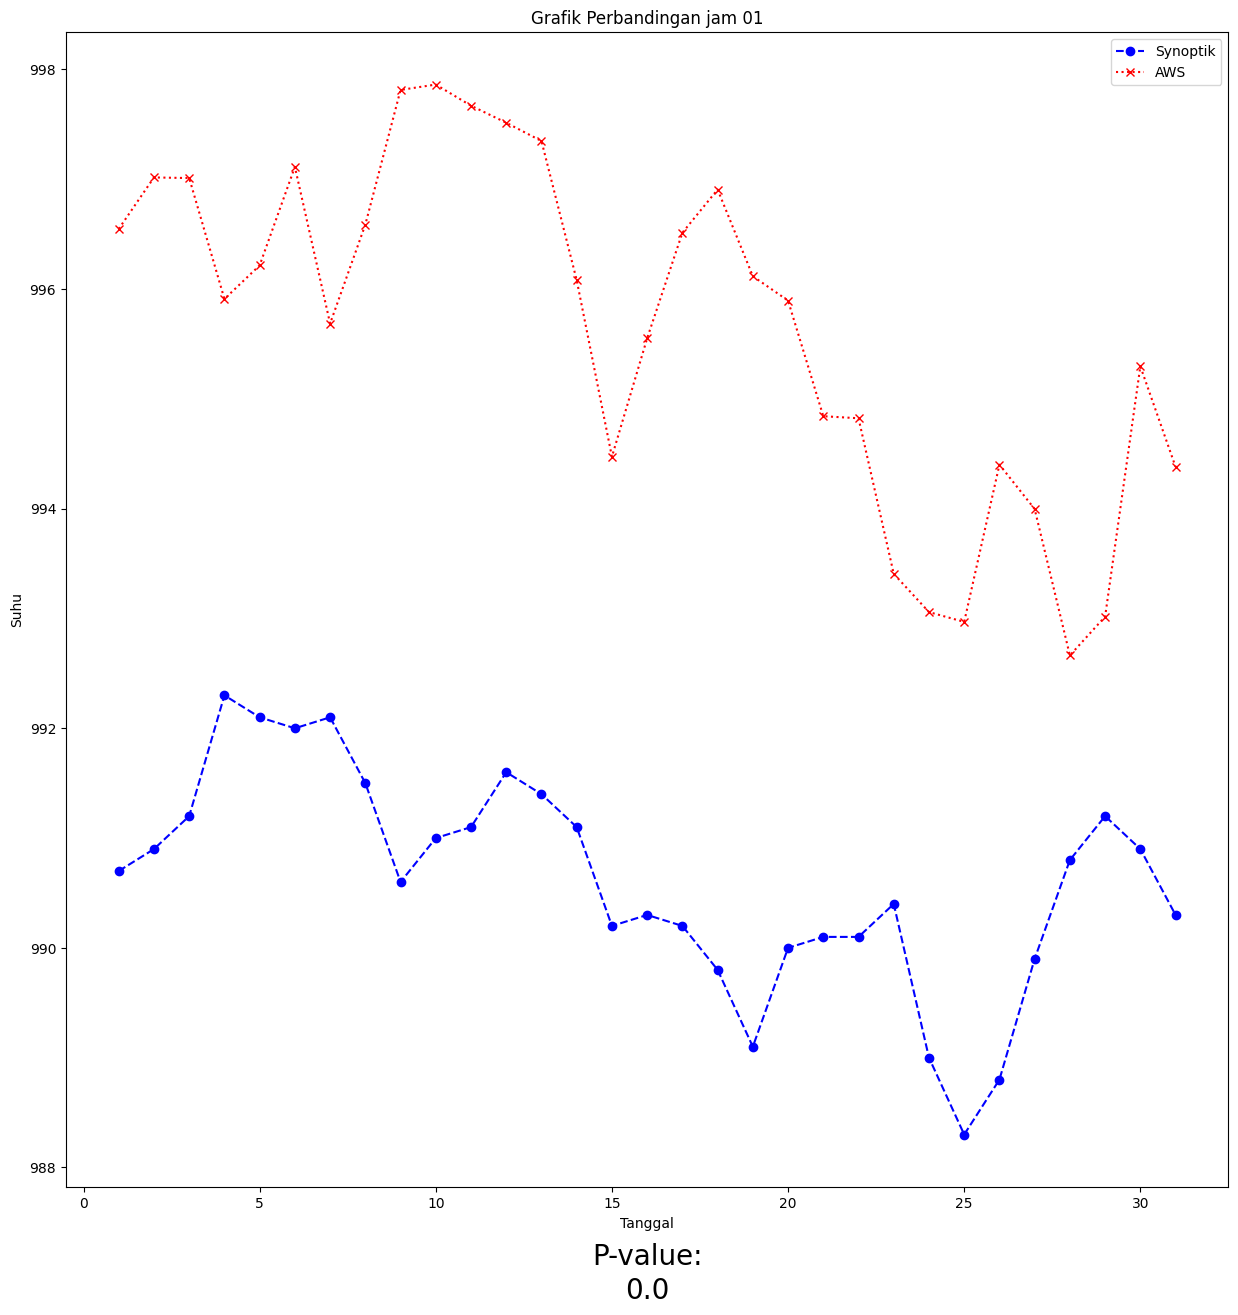

In [6]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('01:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['1']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='1', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['1'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('1')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['1']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='1', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['1'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('1')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('1')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('1')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['1']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='1', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['1'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('1')
    else:
      print("Dilakukan Uji T")
      ujiT('1')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('1')
    else:
      print("Dilakukan Uji T")
      ujiT('1')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 01')
plt.plot(df2_4['Tgl'], df2_4['1'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 2

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\3827205531.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([], dtype='int64')
P-value sinop: 0.25816065073013306
P-vaalue aws: 0.05026009678840637
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 15.101659210899081
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


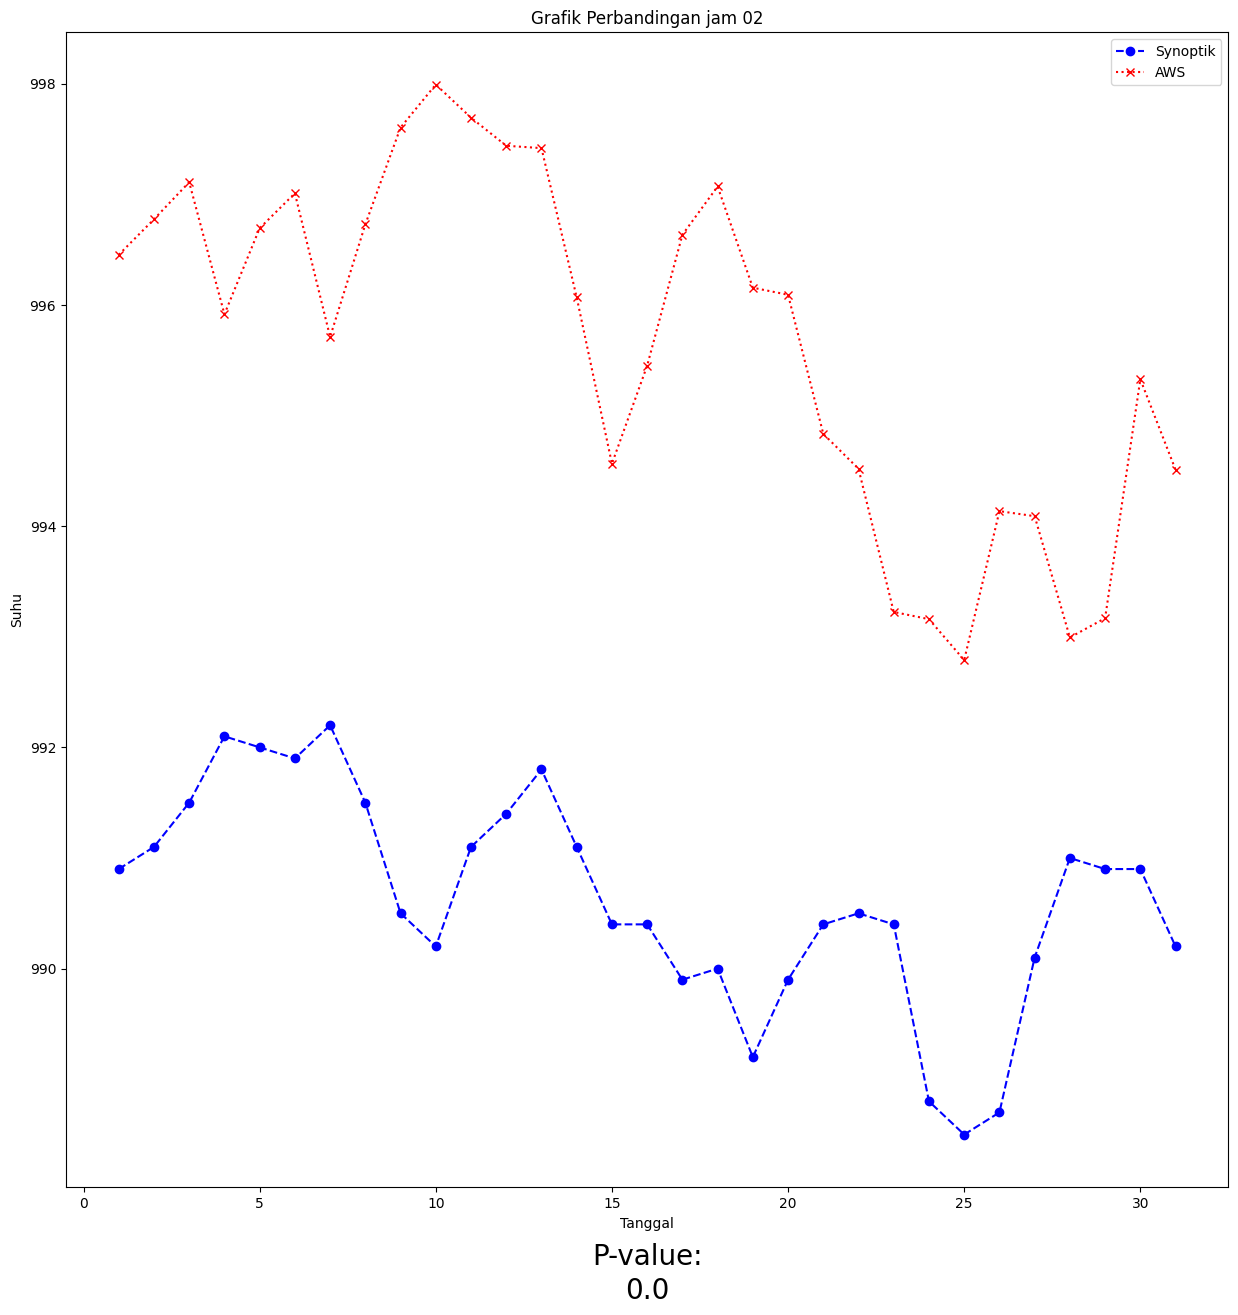

In [7]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('02:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['2']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='2', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['2'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('2')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['2']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='2', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['2'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('2')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('2')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('2')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['2']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='2', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['2'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('2')
    else:
      print("Dilakukan Uji T")
      ujiT('2')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('2')
    else:
      print("Dilakukan Uji T")
      ujiT('2')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 02')
plt.plot(df2_4['Tgl'], df2_4['2'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 3

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\3922463546.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([], dtype='int64')
P-value sinop: 0.07736433297395706
P-vaalue aws: 0.016333909705281258
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=961.00, p=0.00
Terdapat perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


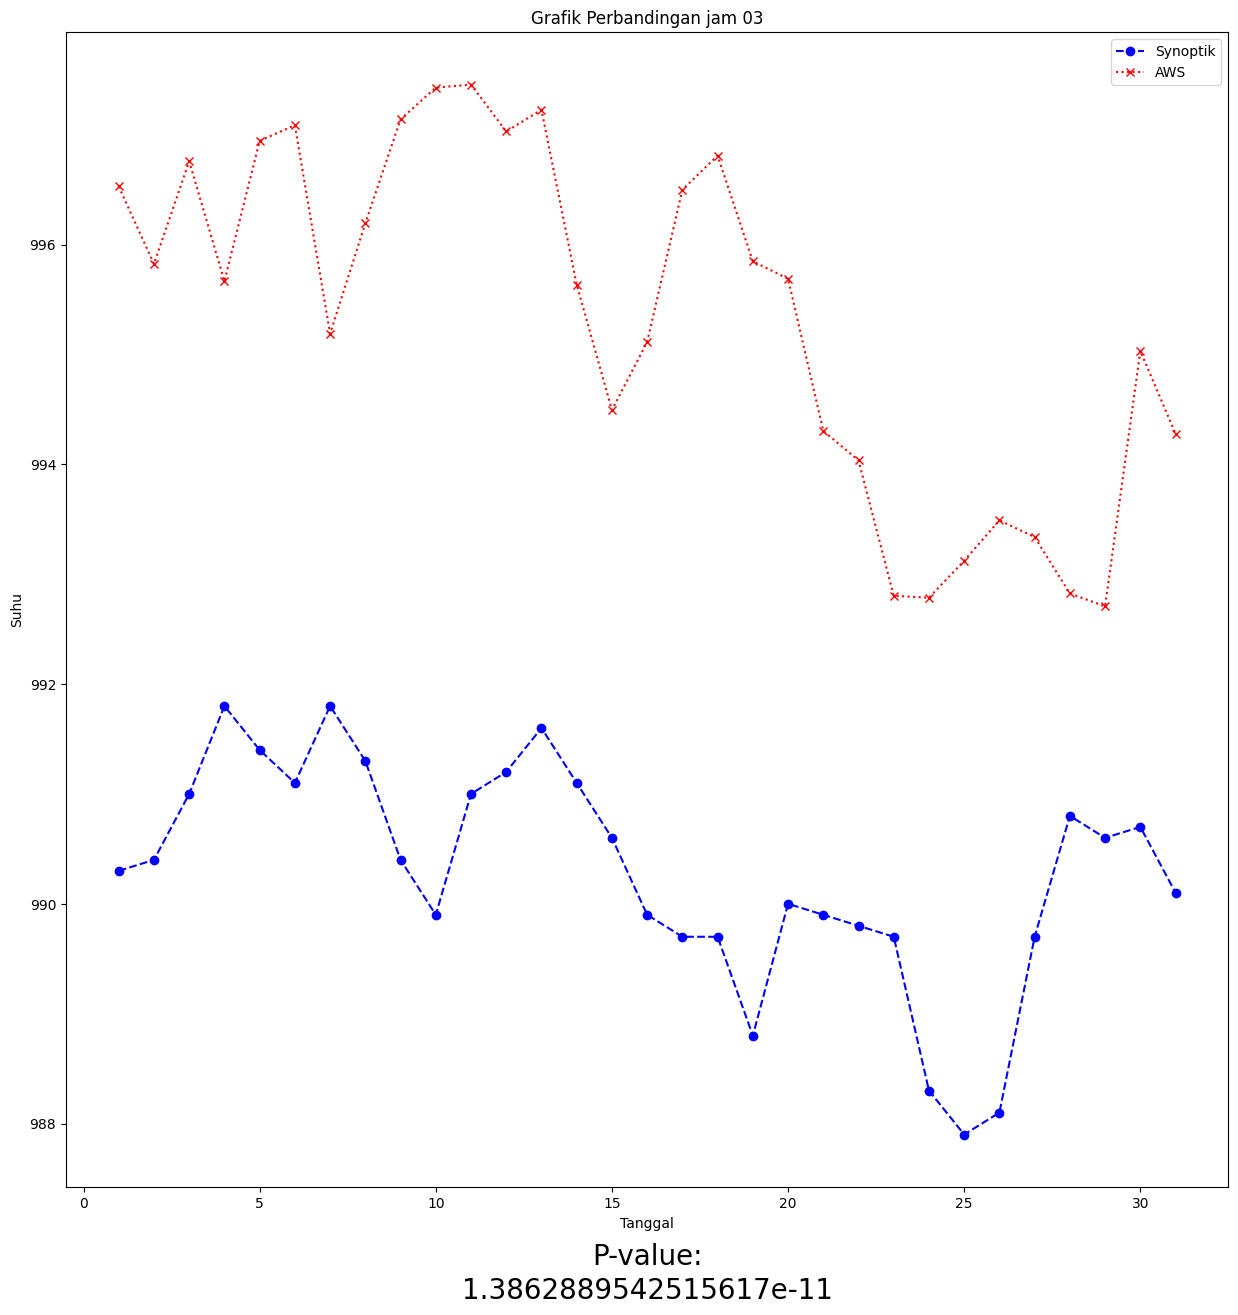

In [8]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('03:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['3']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='3', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['3'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('3')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['3']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='3', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['3'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('3')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('3')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('3')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['3']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='3', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['3'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('3')
    else:
      print("Dilakukan Uji T")
      ujiT('3')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('3')
    else:
      print("Dilakukan Uji T")
      ujiT('3')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 03')
plt.plot(df2_4['Tgl'], df2_4['3'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 4

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\3693782068.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([], dtype='int64')
P-value sinop: 0.10551873594522476
P-vaalue aws: 0.09164855629205704
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.671155501844904
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


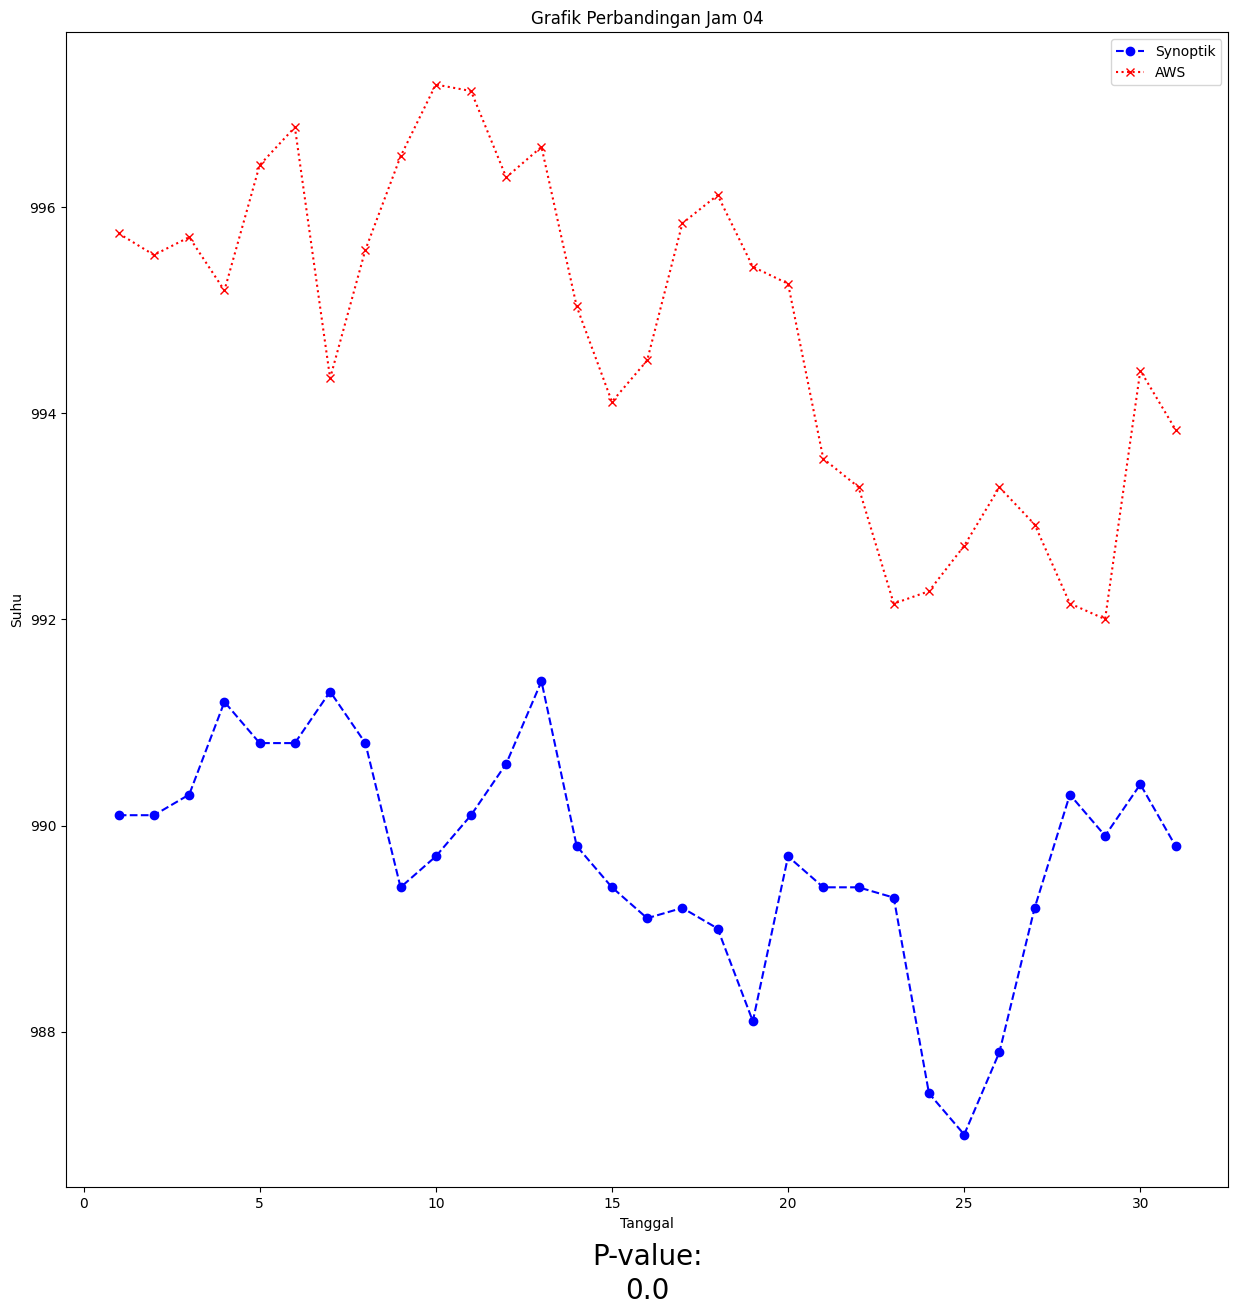

In [9]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('04:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['4']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='4', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['4'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('4')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['4']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='4', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['4'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('4')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('4')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('4')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['4']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='4', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['4'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('4')
    else:
      print("Dilakukan Uji T")
      ujiT('4')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('4')
    else:
      print("Dilakukan Uji T")
      ujiT('4')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 04')
plt.plot(df2_4['Tgl'], df2_4['4'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 5

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\496346007.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([], dtype='int64')
P-value sinop: 0.1797439306974411
P-vaalue aws: 0.11919787526130676
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.556121083222111
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


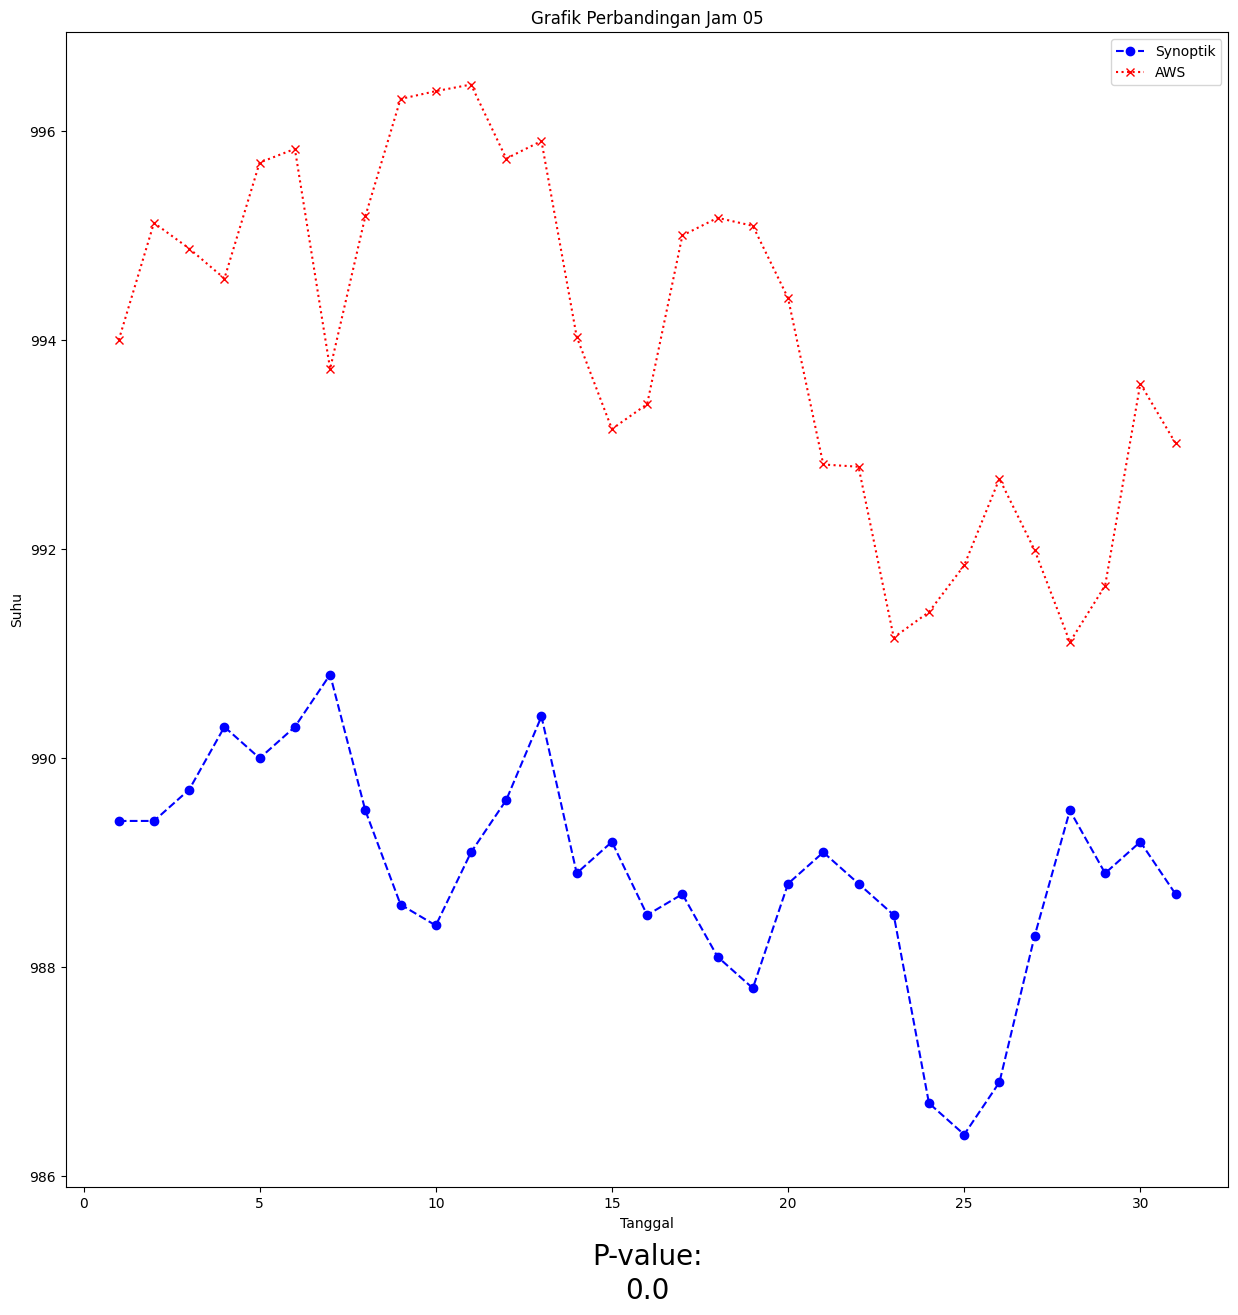

In [10]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('05:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['5']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='5', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['5'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('5')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['5']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='5', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['5'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('5')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('5')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('5')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['5']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='5', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['5'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('5')
    else:
      print("Dilakukan Uji T")
      ujiT('5')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('5')
    else:
      print("Dilakukan Uji T")
      ujiT('5')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 05')
plt.plot(df2_4['Tgl'], df2_4['5'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 6

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\2315856037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([], dtype='int64')
P-value sinop: 0.16073119640350342
P-vaalue aws: 0.22146904468536377
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.168846916932868
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


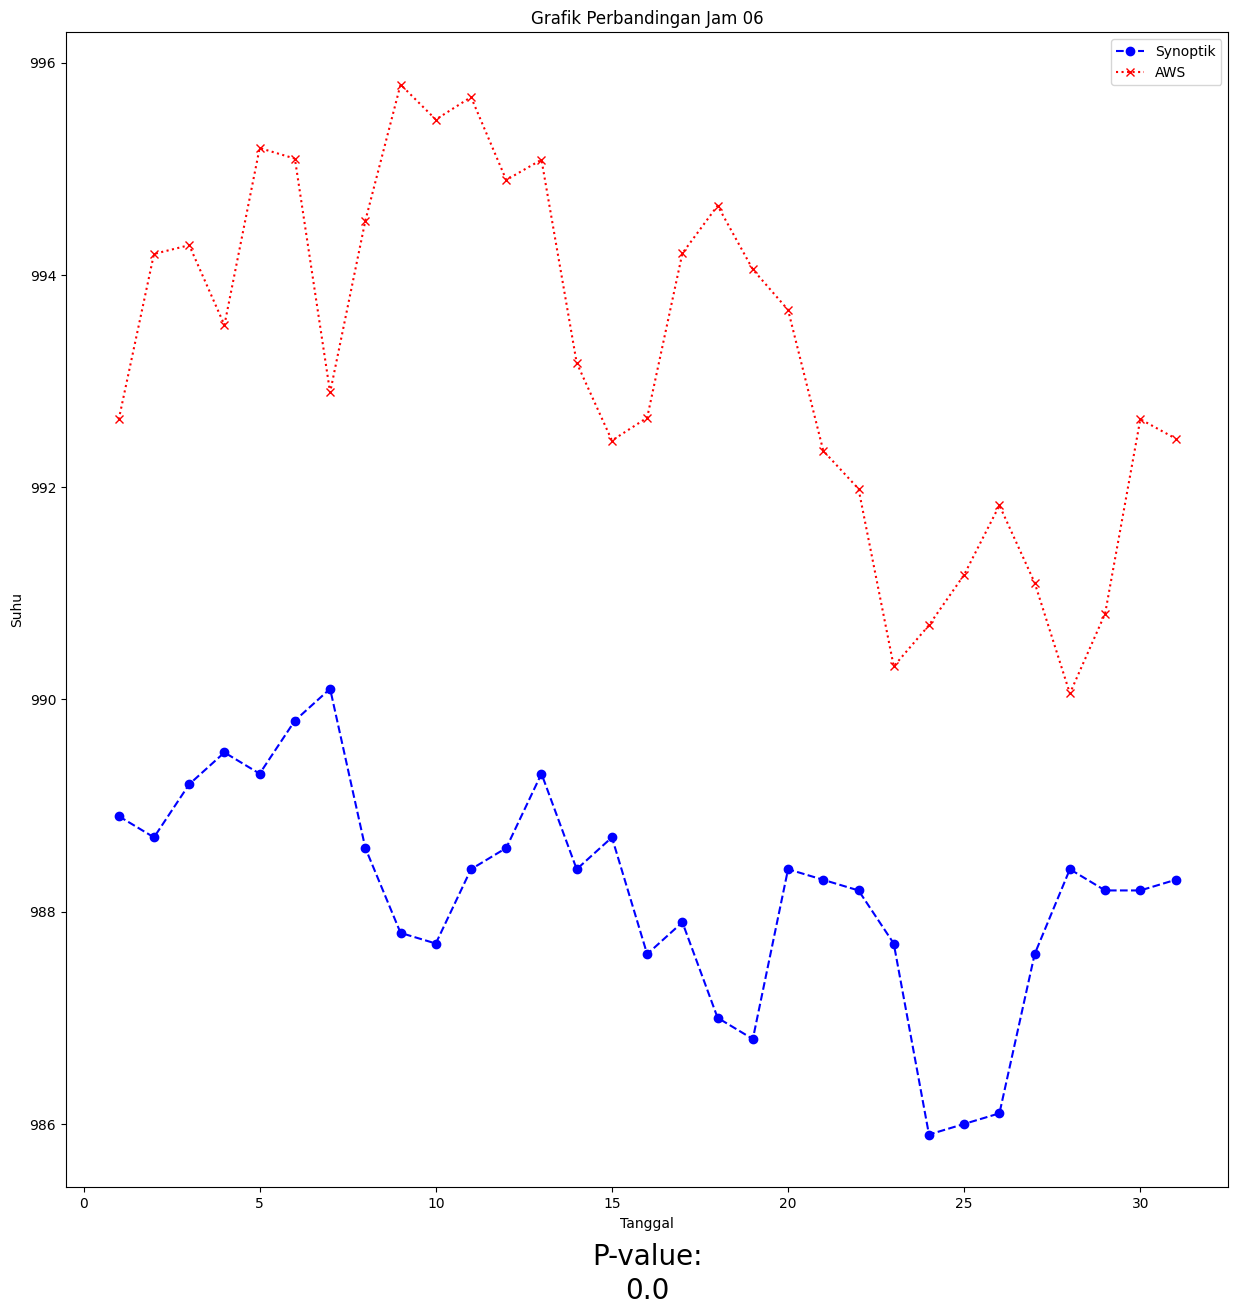

In [11]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('06:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['6']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='6', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['6'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('6')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['6']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='6', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['6'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('6')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('6')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('6')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['6']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='6', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['6'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('6')
    else:
      print("Dilakukan Uji T")
      ujiT('6')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('6')
    else:
      print("Dilakukan Uji T")
      ujiT('6')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 06')
plt.plot(df2_4['Tgl'], df2_4['6'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 7

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\3902557064.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([], dtype='int64')
P-value sinop: 0.29361313581466675
P-vaalue aws: 0.17770518362522125
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.14269827168761
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


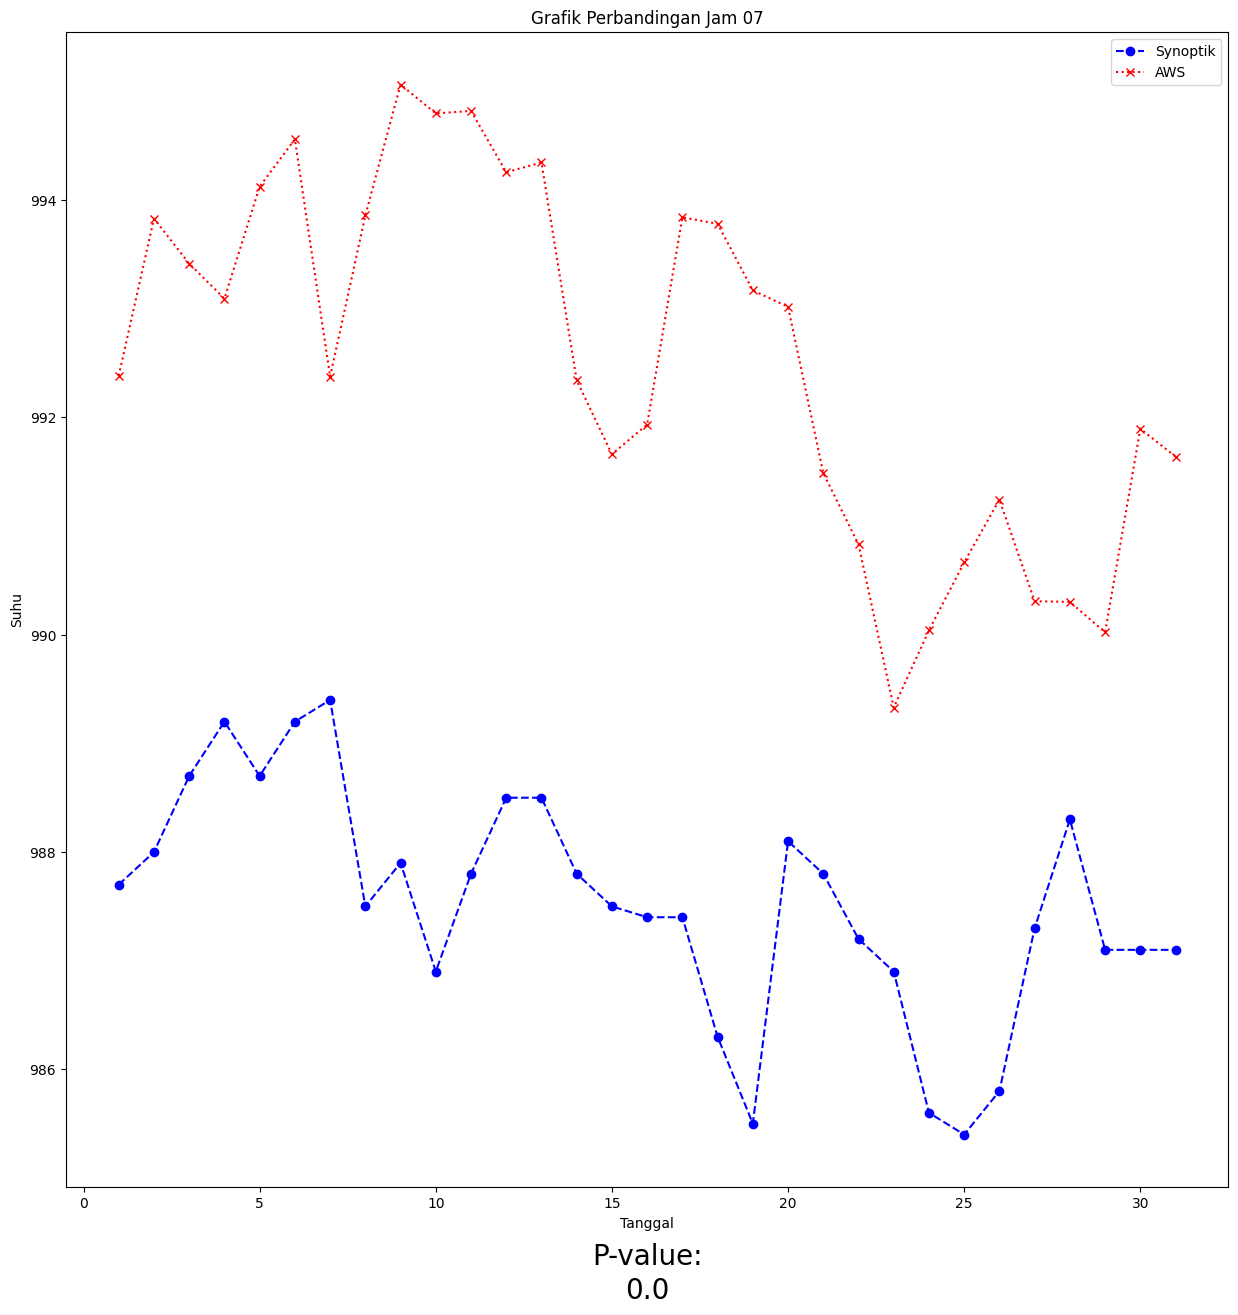

In [12]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('07:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['7']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='7', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['7'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('7')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['7']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='7', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['7'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('7')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('7')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('7')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['7']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='7', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['7'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('7')
    else:
      print("Dilakukan Uji T")
      ujiT('7')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('7')
    else:
      print("Dilakukan Uji T")
      ujiT('7')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 07')
plt.plot(df2_4['Tgl'], df2_4['7'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 8

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\3955583336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([151], dtype='int64')
P-value sinop: 0.5770220756530762
P-vaalue aws: 0.33839017152786255
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.220140196556418
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


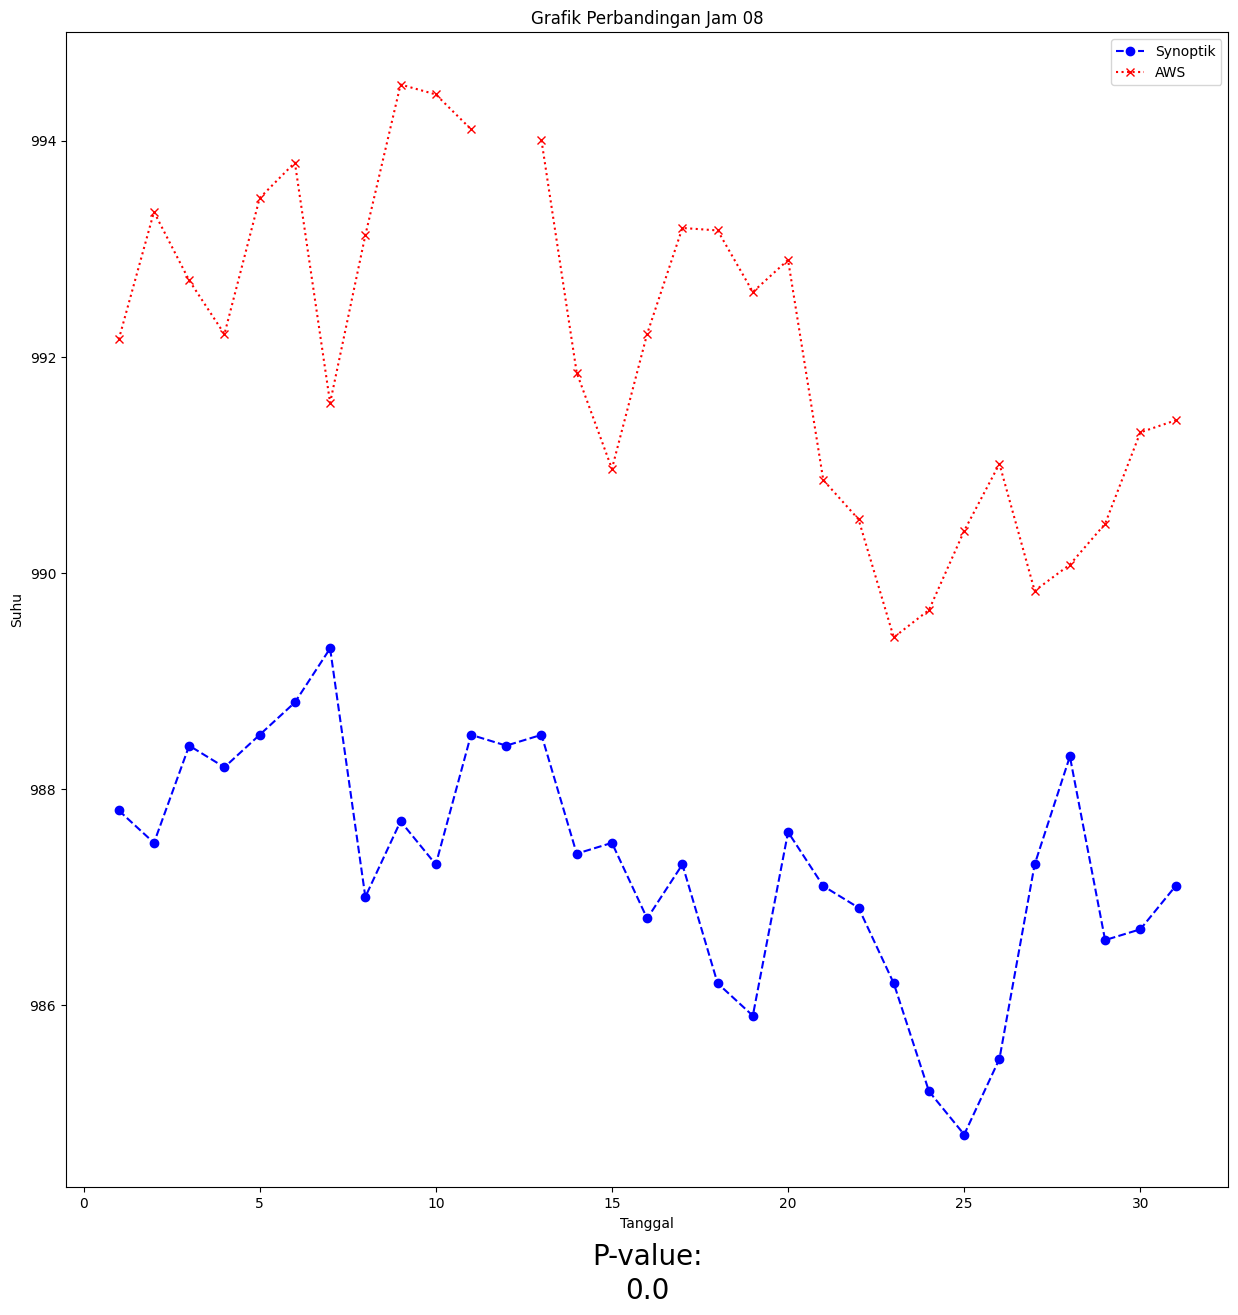

In [13]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('08:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['8']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='8', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['8'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('8')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['8']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='8', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['8'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('8')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('8')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('8')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['8']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='8', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['8'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('8')
    else:
      print("Dilakukan Uji T")
      ujiT('8')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('8')
    else:
      print("Dilakukan Uji T")
      ujiT('8')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 08')
plt.plot(df2_4['Tgl'], df2_4['8'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 9

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\3896365322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([152], dtype='int64')
P-value sinop: 0.7327816486358643
P-vaalue aws: 0.46331310272216797
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.562468848403858
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


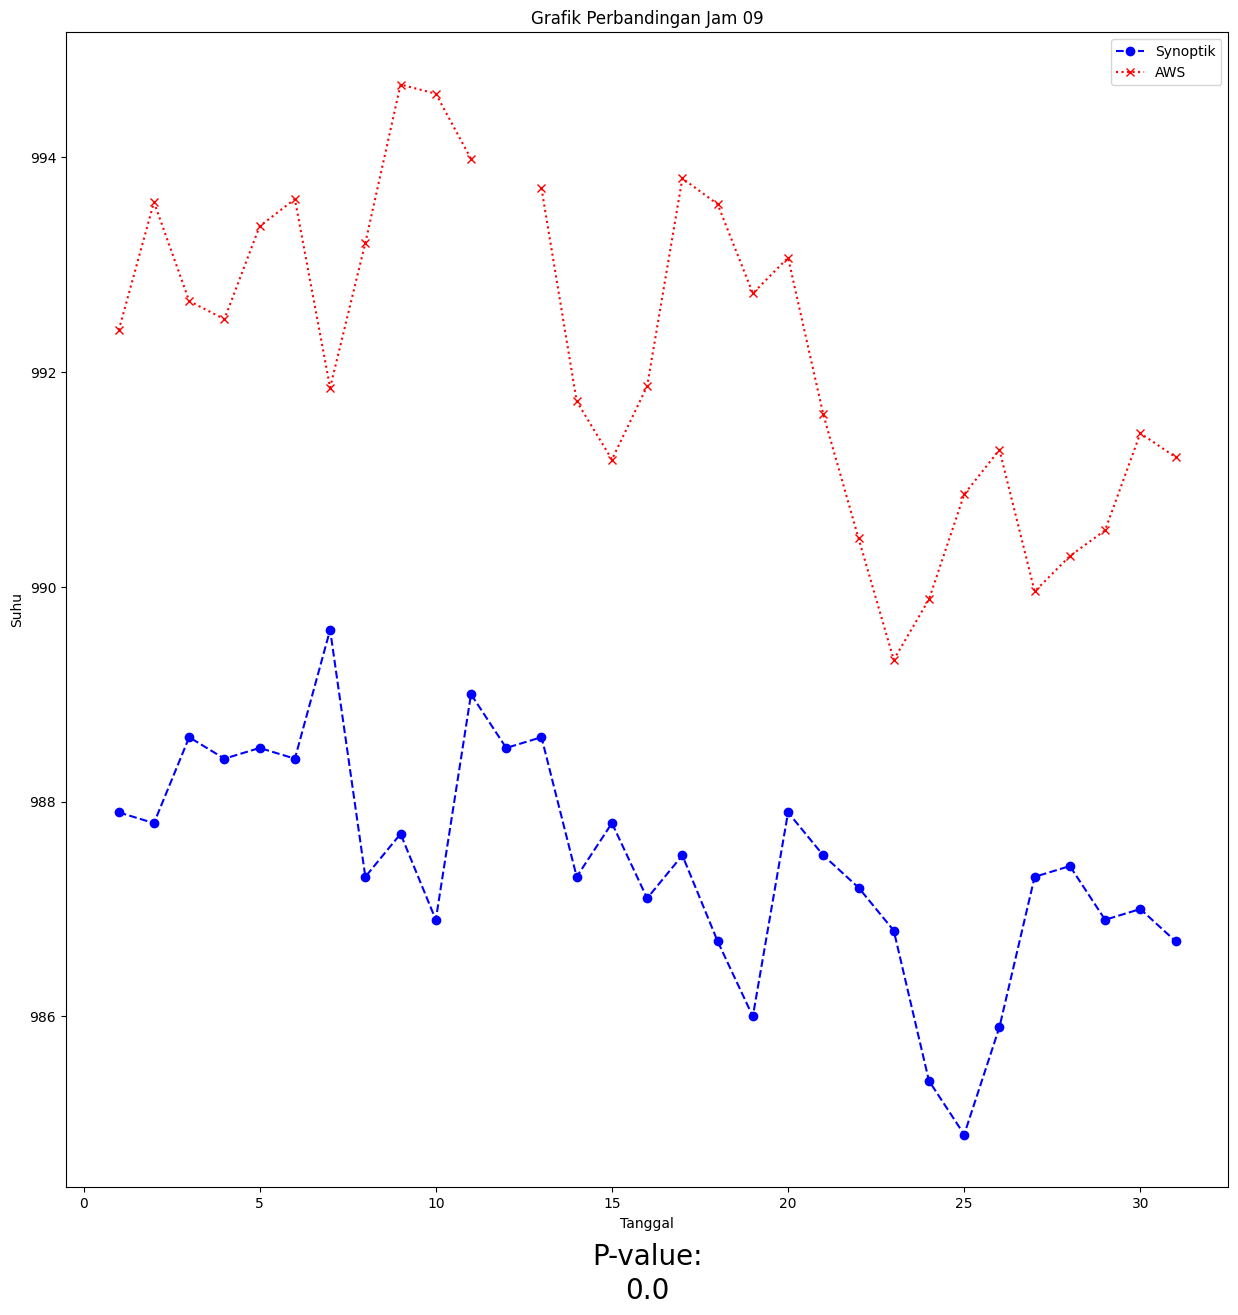

In [14]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('09:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['9']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='9', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['9'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('9')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['9']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='9', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['9'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('9')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('9')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('9')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['9']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='9', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['9'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('9')
    else:
      print("Dilakukan Uji T")
      ujiT('9')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('9')
    else:
      print("Dilakukan Uji T")
      ujiT('9')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 09')
plt.plot(df2_4['Tgl'], df2_4['9'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 10

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\1948628060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([153], dtype='int64')
P-value sinop: 0.9180537462234497
P-vaalue aws: 0.4936177134513855
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.360363897476738
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


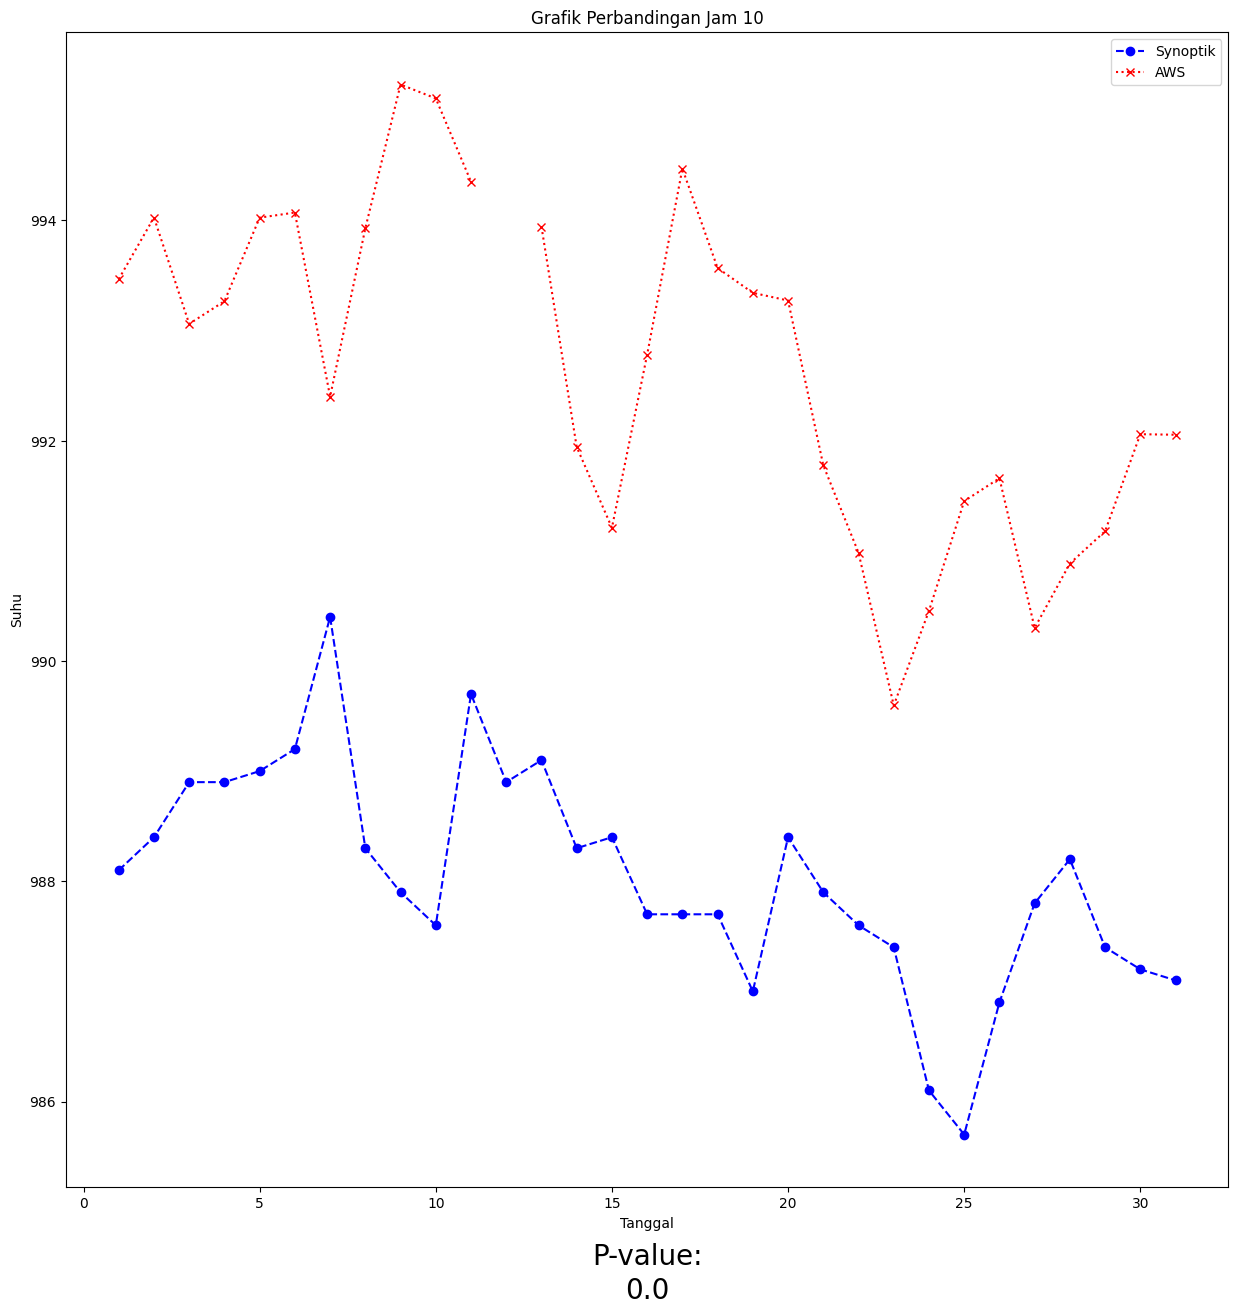

In [15]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('10:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['10']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='10', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['10'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('10')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['10']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='10', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['10'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('10')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('10')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('10')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['10']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='10', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['10'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10')
    else:
      print("Dilakukan Uji T")
      ujiT('10')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10')
    else:
      print("Dilakukan Uji T")
      ujiT('10')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 10')
plt.plot(df2_4['Tgl'], df2_4['10'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 11

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\1262213571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([154], dtype='int64')
P-value sinop: 0.9128638505935669
P-vaalue aws: 0.39644375443458557
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.494823368367111
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


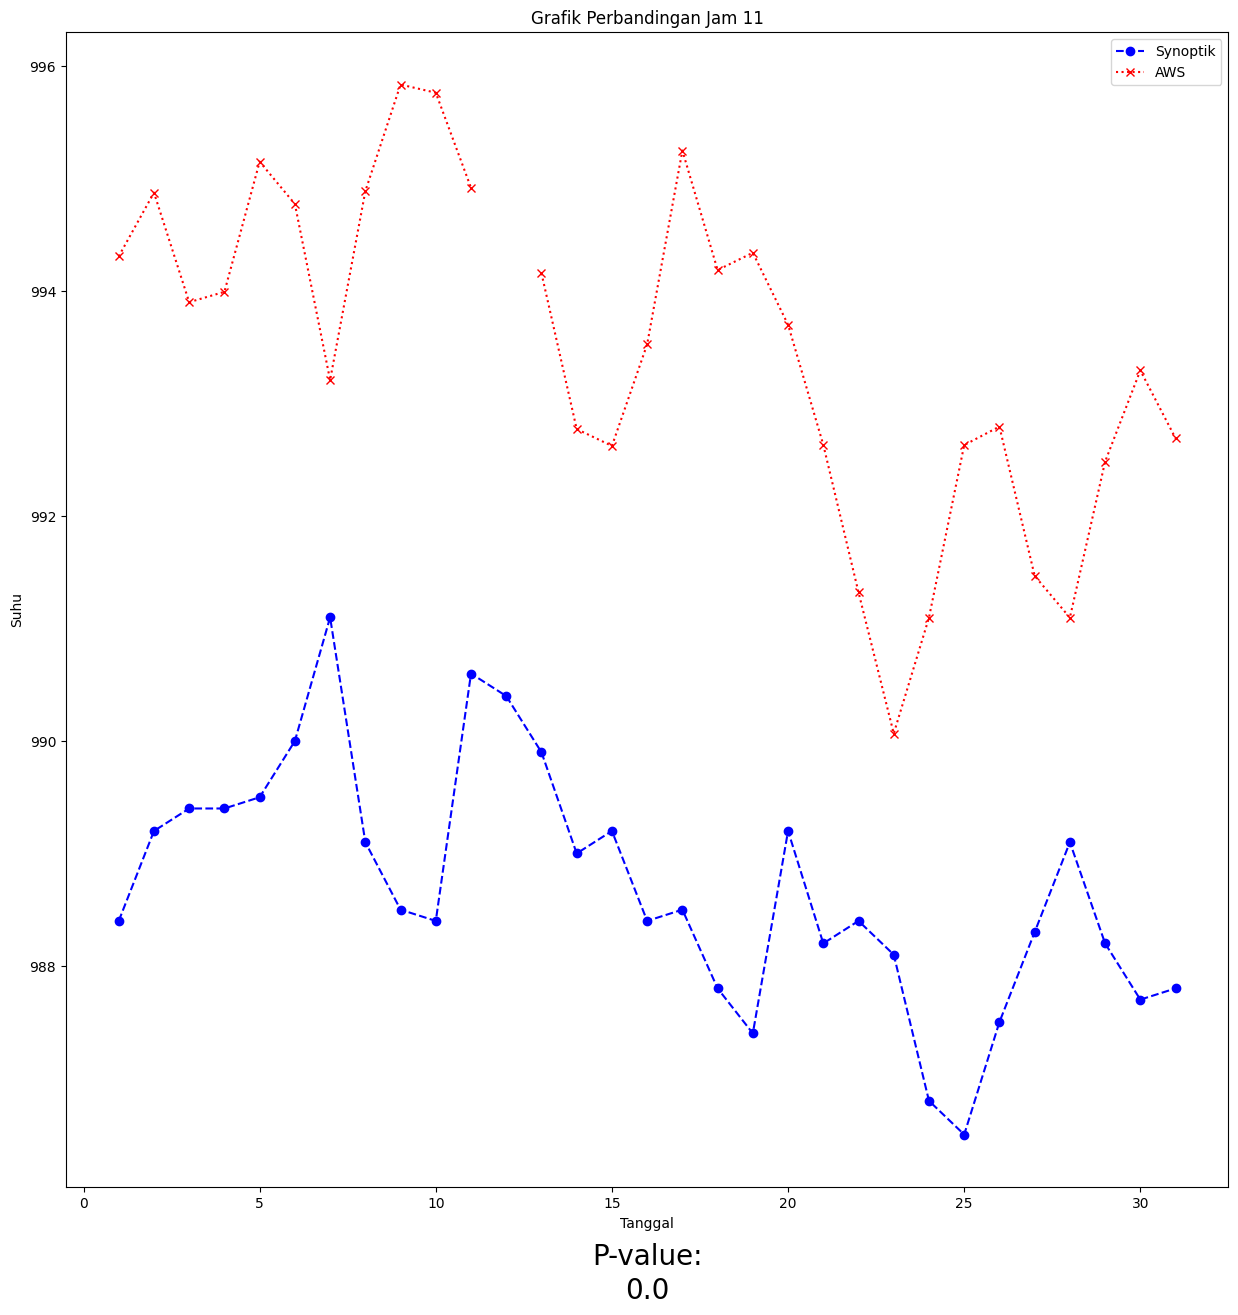

In [16]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('11:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['11']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='11', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['11'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('11')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['11']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='11', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['11'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('11')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('11')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('11')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['11']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='11', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['11'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11')
    else:
      print("Dilakukan Uji T")
      ujiT('11')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11')
    else:
      print("Dilakukan Uji T")
      ujiT('11')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 11')
plt.plot(df2_4['Tgl'], df2_4['11'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 12

C:\Users\Acer\AppData\Local\Temp\ipykernel_19932\3046355771.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midnight_filter['Tgl']=Tgl


Indeks baris yang berisi NaN:
Index([155], dtype='int64')
P-value sinop: 0.9705533385276794
P-vaalue aws: 0.4726108908653259
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.346348471589522
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


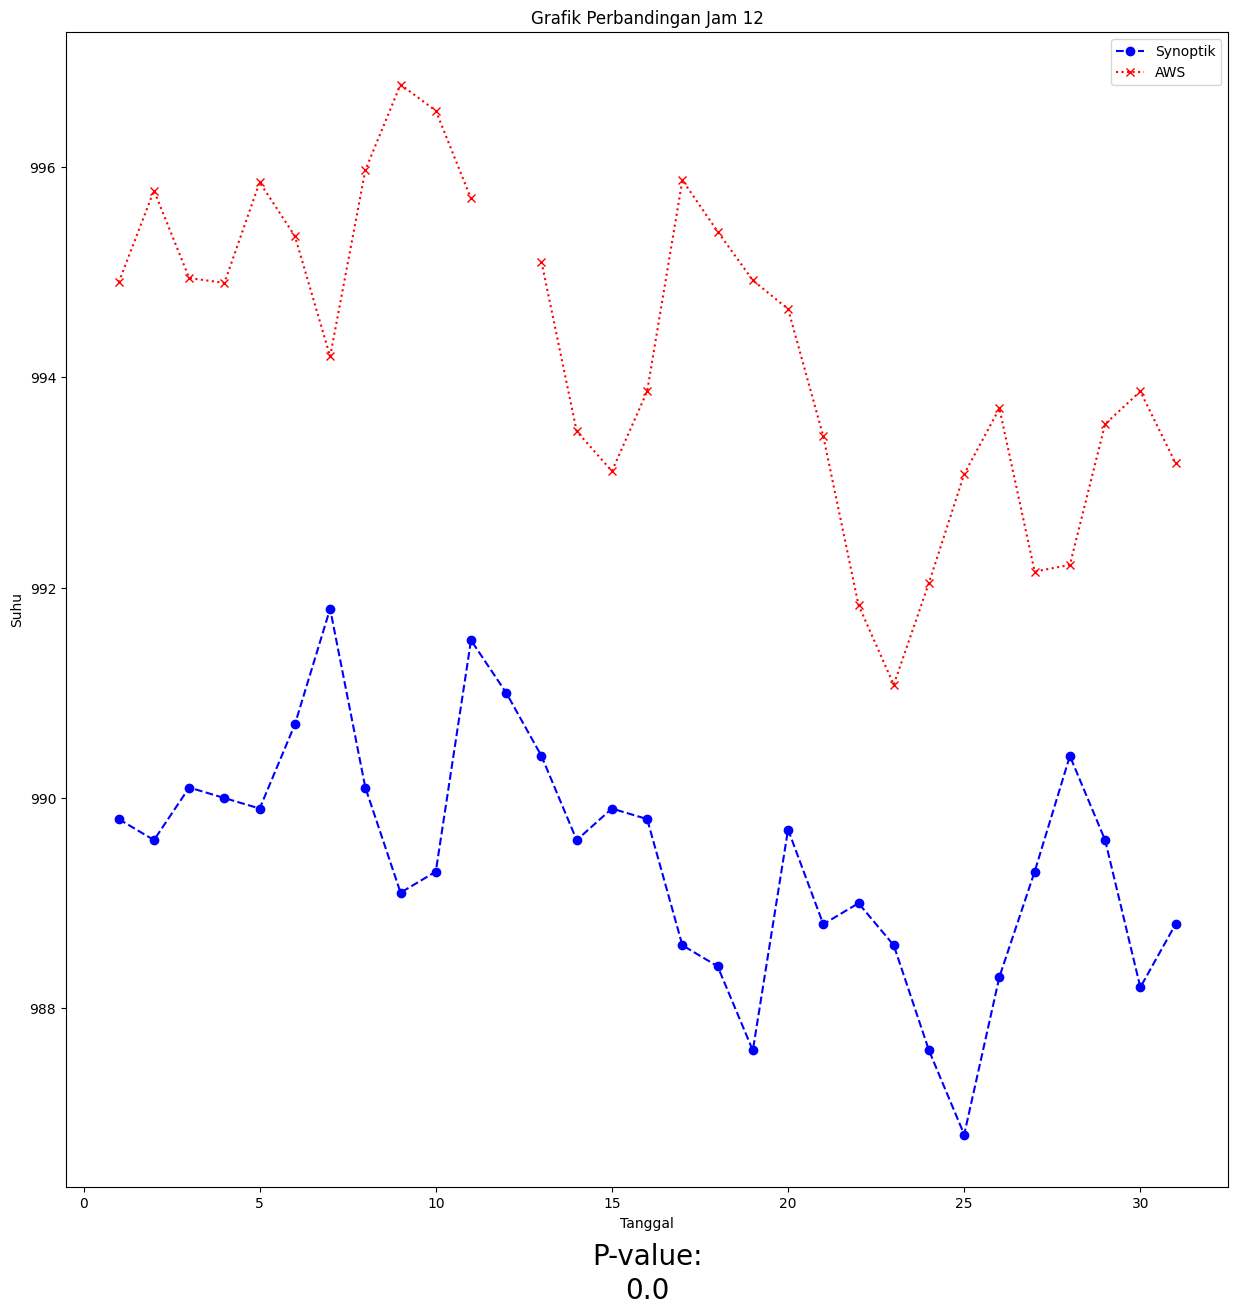

In [17]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('12:00:00').time()]
Tgl=[]
for i in range(32):
  Tgl.append(i)
Tgl.remove(0)
midnight_filter['Tgl']=Tgl
d1_4=midnight_filter['pp_air']
df1_4 = dp.DataFrame(d1_4)
df1_4['Tgl']=Tgl

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = midnight_filter['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['12']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='12', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='pp_air', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['12'])
print("P-value sinop:",p_value4)
#AWS
df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
print("P-vaalue aws:",p_value14)
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('12')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05 and p_value14<0.05:
      print("Kedua data tidak berdistribusi Normal")
       #Normalisasi
      df_max_scaled = df_cleaned14['12']
      for col in df_max_scaled:
            df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Tgl']=df_cleaned14['Tgl']
        #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='12', ascending=True)
    
        #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['12'])
      #Normalisasi
      df_max_scaled3 = df_cleaned_4['pp_air']
      for col3 in df_max_scaled3:
        df_max_scaled3= absolute_maximum_scale(df_max_scaled3)
      df_max_scaled3=dp.DataFrame(df_max_scaled3)
      df_max_scaled3['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
      df_sorted1_4 = df_max_scaled3.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
      df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
      if p_value14<0.05 and p_value4<0.05:
       print("Kedua data tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('12')
      elif p_value4<0.05:
       print("Data sinoptik tetap tidak berdistribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
       mwu('12')
      elif p_value14<0.05:
       print("Data AWS tetap tidak berditribusi normal setelah dilakukan normalisasi maka dilakukan uji Mann-Whitney U")
      else:
       print("Kedua data berdistribusi normal maka dilakukan Uji T")
       ujiT('12')
  elif p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['12']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='12', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['12'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12')
    else:
      print("Dilakukan Uji T")
      ujiT('12')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['pp_air']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='pp_air', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['pp_air'] = df_sorted1_4['pp_air'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['pp_air'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12')
    else:
      print("Dilakukan Uji T")
      ujiT('12')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['pp_air']=df1_4['pp_air'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 12')
plt.plot(df2_4['Tgl'], df2_4['12'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['pp_air'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()